## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Eksplorasi Data

In [2]:
df = pd.read_csv('../data iris.csv', delimiter=";")  # Ganti dengan file Anda
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Melihat Informasi data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


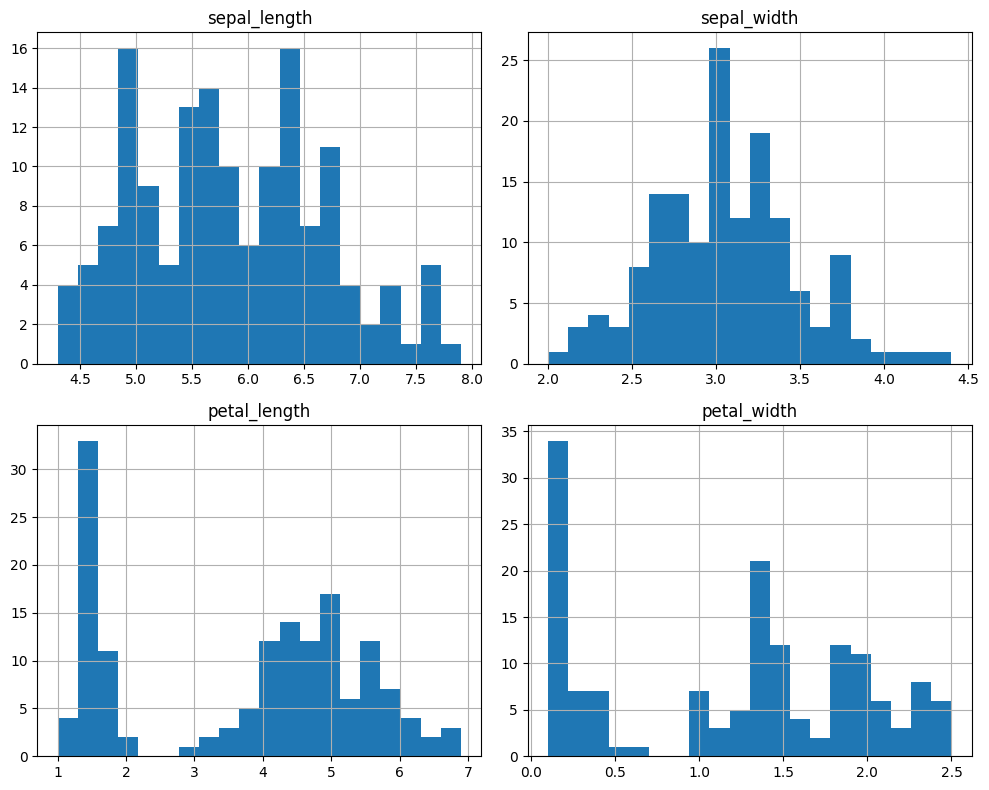

In [5]:
# Membuat histogram untuk setiap fitur
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


## Data Cleaning

In [6]:
df = df.drop(columns=['class'], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


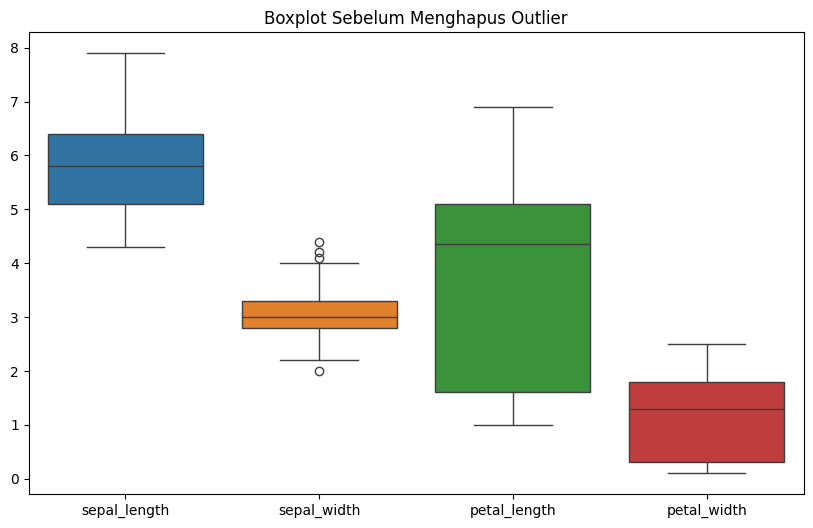

In [7]:
# Boxplot sebelum menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:])  # Exclude kolom 'class'
plt.title("Boxplot Sebelum Menghapus Outlier")
plt.show()

dalam kode di atas kita mencoba melihat apakah **datanya ada outliers atau tidak** pada seluruh fitur. Dari hasil yang di atas, kita dapat melihat **terdapat outliers** untuk bagian **sepal_width** di bawah persegi (**lingkaran pada titik y di angka mendekati 2**) dan di atas titik y 4.


In [8]:
# Hitung Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Jumlah data sebelum menghapus outlier: {df.shape[0]}")

# Hapus outlier
df = df[~((df.iloc[:, :-1] < lower_bound) | (df.iloc[:, :-1] > upper_bound)).any(axis=1)]

print(f"Jumlah data setelah menghapus outlier: {df.shape[0]}")


Jumlah data sebelum menghapus outlier: 150
Jumlah data setelah menghapus outlier: 146



dalam kode di atas, kita menggunakan metode **IQR** untuk menghilangkan outliernya. Metode ini bekerja dengan cara menghapus data yang berada di luar rentang normal, yaitu data yang berada di bawah batas bawah (lower bound) dan di atas batas atas (upper bound).


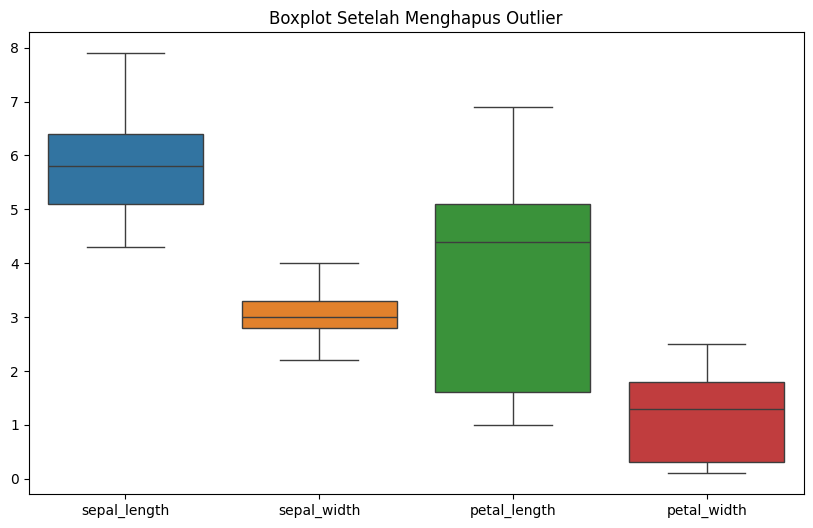

In [9]:
# Boxplot setelah menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:])  # Exclude kolom 'class'
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()




Dalam kode `sns.boxplot(data=df.iloc[:, :-1])`, kita memvisualisasikan data setelah menghapus outlier. Dari boxplot, kita dapat melihat bahwa **tidak ada lagi outlier**, yang ditandai dengan lingkaran di luar whiskers. Hal ini menunjukkan bahwa data telah bersih dan distribusinya kini lebih sesuai dengan rentang normal.


In [10]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width
34,4.9,3.1,1.5,0.1
37,4.9,3.1,1.5,0.1
142,5.8,2.7,5.1,1.9



dalam kode di atas `df[df.duplicated()]` kita mencoba melihat apakah **ada data yang terduplikasi atau tidak**. Dari hasil tersebut, kita dapat melihat kalau **ada data yang terduplikasi**. Maka kita akan masuk pada tahapan selanjutnya untuk menghilangkan data duplikasi tersebut.


In [11]:
df.drop_duplicates(inplace=True)
df.shape

(143, 4)


dalam kode di atas `df.drop_duplicates(inplace=True)` telah menghilangkan data yang terduplikasi tersebut. kemudian pada kode `df.shape` kita dapat melihat hasil **kolom dan baris** nya menjadi `(143, 4)`.


In [12]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


dalam kode di atas `df.isna().sum()` kita akan melihat dari data tersebut apakah `ada data kosong atau tidak`. Dari hasil diatas tidak terdapat data yang kosong. Maka kita bisa lanjut ke tahapan selanjutnya. `df.isna()` artinya kita akan melihat untuk apakah suatu data itu kosong atau tidak. `.sum()` digunakan untuk menghitung berapa banyak data untuk setiap kolom yang hilang.

## Data Preprocess

In [13]:
# Normalisasi menggunakan Min-Max Scaling
data = df.values  # Mengambil data sebagai numpy array
min_vals = np.min(data, axis=0)
max_vals = np.max(data, axis=0)
data_normalized = (data - min_vals) / (max_vals - min_vals)
# range_vals = max_vals - min_vals
# range_vals[range_vals == 0] = 1  # Menghindari pembagian nol
# data_normalized = (data - min_vals) / range_vals
print(data_normalized)


[[0.22222222 0.72222222 0.06779661 0.04166667]
 [0.16666667 0.44444444 0.06779661 0.04166667]
 [0.11111111 0.55555556 0.05084746 0.04166667]
 [0.08333333 0.5        0.08474576 0.04166667]
 [0.19444444 0.77777778 0.06779661 0.04166667]
 [0.30555556 0.94444444 0.11864407 0.125     ]
 [0.08333333 0.66666667 0.06779661 0.08333333]
 [0.19444444 0.66666667 0.08474576 0.04166667]
 [0.02777778 0.38888889 0.06779661 0.04166667]
 [0.16666667 0.5        0.08474576 0.        ]
 [0.30555556 0.83333333 0.08474576 0.04166667]
 [0.13888889 0.66666667 0.10169492 0.04166667]
 [0.13888889 0.44444444 0.06779661 0.        ]
 [0.         0.44444444 0.01694915 0.        ]
 [0.41666667 1.         0.03389831 0.04166667]
 [0.30555556 0.94444444 0.05084746 0.125     ]
 [0.22222222 0.72222222 0.06779661 0.08333333]
 [0.38888889 0.88888889 0.11864407 0.08333333]
 [0.22222222 0.88888889 0.08474576 0.08333333]
 [0.30555556 0.66666667 0.11864407 0.04166667]
 [0.22222222 0.83333333 0.08474576 0.125     ]
 [0.08333333 

## KMeans Clustering

In [14]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, min_diff=1e-4, random_state=None,verbose=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.min_diff = min_diff
        self.random_state = random_state
        self.centroids = None
        self.verbose = verbose

    def fit(self, data):
        np.random.seed(self.random_state)
        self.centroids = self._initialize_centroids(data)
        
        # Menampilkan centroid awal
        # print("Centroid Awal:")
        # print(self.centroids)
        if self.verbose:
            # Menampilkan centroid awal
            print("Centroid Awal :")
            print(self.centroids)

        for iteration in range(self.max_iter):
            distances = self._compute_distances(data, self.centroids)
            labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.copy(self.centroids)
            for i in range(self.n_clusters):
                cluster_data = data[labels == i]
                if len(cluster_data) > 0:
                    new_centroids[i] = cluster_data.mean(axis=0)
                # Jika cluster kosong, biarkan centroid tetap sama atau pilih acak titik
                else:
                    new_centroids[i] = data[np.random.choice(data.shape[0])]

            diff = np.linalg.norm(self.centroids - new_centroids)
            self.centroids = new_centroids

            # Jika verbose=True, tampilkan hasil iterasi
            if self.verbose:
                print(f"Iteration {iteration + 1}")
                print(f"Centroids:\n{self.centroids}")
                print(f"Difference: {diff}")

            # Jika perubahan centroid sudah cukup kecil, hentikan iterasi
            if diff < self.min_diff:
                if self.verbose:
                    print(f"Converged after {iteration + 1} iterations.")
                break

    def predict(self, data):
        distances = self._compute_distances(data, self.centroids)
        return np.argmin(distances, axis=1)

    def _initialize_centroids(self, data):
        # Mendapatkan nilai min dan max untuk setiap fitur
        min_vals = np.min(data, axis=0)
        max_vals = np.max(data, axis=0)

        # Inisialisasi centroid dengan memilih acak di dalam rentang nilai min dan max untuk setiap fitur
        centroids = np.random.rand(self.n_clusters, data.shape[1]) * (max_vals - min_vals) + min_vals
        
        return centroids

    def _compute_distances(self, data, centroids):
        return np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

    def compute_wcss(self, data):
        labels = self.predict(data)
        wcss = 0
        for i in range(self.n_clusters):
            cluster_data = data[labels == i]
            cluster_centroid = self.centroids[i]
            wcss += np.sum(np.linalg.norm(cluster_data - cluster_centroid, axis=1) ** 2)
        return wcss

In [15]:
# Menentukan nilai K dan jumlah iterasi
kmeans = KMeans(n_clusters=3, random_state=42, verbose=True)


In [16]:
# Melakukan fitting pada data yang sudah dinormalisasi
kmeans.fit(data_normalized)

# Mendapatkan label cluster dari data
labels = kmeans.predict(data_normalized)
centroids_manual = kmeans.centroids


Centroid Awal :
[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]]
Iteration 1
Centroids:
[[0.50687569 0.53905391 0.53717067 0.53341584]
 [0.26653439 0.28968254 0.34180791 0.32142857]
 [0.02777778 0.55555556 0.05084746 0.04166667]]
Difference: 1.3605343062210304
Iteration 2
Centroids:
[[0.60042735 0.43874644 0.7053455  0.70886752]
 [0.33862434 0.14285714 0.48184019 0.44444444]
 [0.19191919 0.66792929 0.07896764 0.0625    ]]
Difference: 0.42446578813226393
Iteration 3
Centroids:
[[0.62222222 0.44603175 0.72445521 0.73392857]
 [0.36904762 0.21230159 0.51331719 0.4702381 ]
 [0.18888889 0.65432099 0.07834275 0.06296296]]
Difference: 0.09550143108364029
Iteration 4
Centroids:
[[0.64617486 0.46174863 0.74020561 0.75614754]
 [0.39114114 0.24324324 0.5387082  0.49774775]
 [0.18888889 0.65432099 0.07834275 0.06296296]]
Difference: 0.06640407810188542
Iteration 5
Centroids:
[[0.65448343 0.46783626 0.747546

In [17]:
# # Menyimpan nilai WCSS untuk setiap jumlah cluster
# wcss = []

# # Melakukan KMeans untuk cluster 1 sampai 10
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, max_iter=100, min_diff=1e-4, random_state=42, verbose=False)
#     kmeans.fit(data_normalized)
#     wcss.append(kmeans.compute_wcss(data_normalized))

# # Plot Elbow Curve
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, 11), wcss, marker='o')
# plt.title('Elbow Method For Optimal k')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.grid(True)
# plt.show()

In [18]:
# Denormalisasi centroid hasil clustering ke skala asli
centroids_original = (kmeans.centroids * (max_vals - min_vals)) + min_vals


## Visualisasi Hasil Clustering

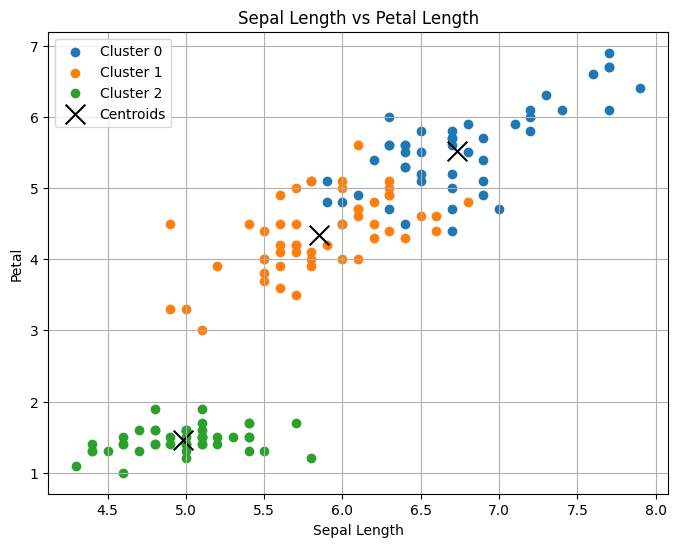

In [19]:
# Denormalisasi data dan centroid
data_original = data_normalized * (max_vals - min_vals) + min_vals
centroids_original = kmeans.centroids * (max_vals - min_vals) + min_vals

plt.figure(figsize=(8, 6))

# Plotting setiap cluster dengan warna yang berbeda
for i in range(kmeans.n_clusters):
    cluster_points = data_original[labels == i]  # Menggunakan data asli
    plt.scatter(cluster_points[:, 0], cluster_points[:, 2], label=f'Cluster {i}')

# Plot centroid
plt.scatter(centroids_original[:, 0], centroids_original[:, 2], 
            s=200, c='black', marker='x', label='Centroids')

# Menambahkan label dan judul
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')  # Sesuaikan dengan nama fitur Anda
plt.ylabel('Petal')  # Sesuaikan dengan nama fitur Anda
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()


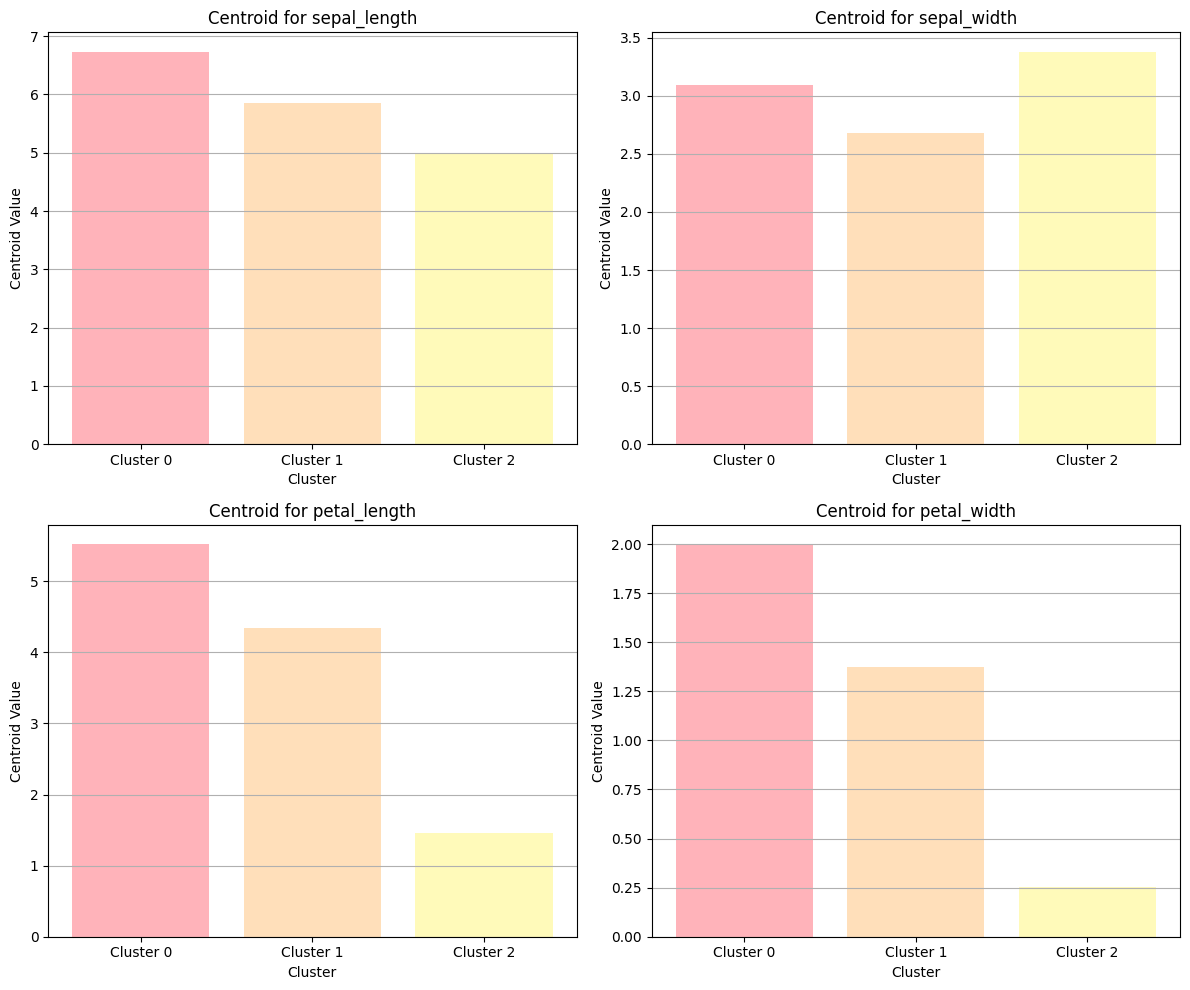

In [20]:
# Asumsikan kmeans.centroids adalah array dengan centroid setiap cluster
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]  # Nama fitur yang digunakan

# Membuat bar plot untuk setiap fitur di plot 2 kolom 2 baris
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 kolom, 2 baris

# Membuat palet warna (misalnya menggunakan 'tab10' untuk 10 warna berbeda)
colors = ['#FFB3BA', '#FFDFBA', '#FFFABA']

# Plot untuk setiap fitur dengan warna berbeda untuk setiap cluster
for i, feature in enumerate(features):
    ax = axes[divmod(i, 2)]  # divmod mengembalikan (row, col) langsung
    for j in range(kmeans.n_clusters):  # Loop untuk setiap cluster
        ax.bar(j, centroids_original[j, i], color=colors[j % len(colors)], label=f'Cluster {j}' if i == 0 else "")  # Warna berbeda untuk setiap cluster
    ax.set_title(f'Centroid for {feature}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Centroid Value')
    ax.set_xticks(np.arange(kmeans.n_clusters))
    ax.set_xticklabels([f'Cluster {j}' for j in range(kmeans.n_clusters)])
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()